In [18]:
import numpy as np
def create_letter_vectors():
    letters = {
        'A': [
            "011110",
            "100001",
            "111111",
            "100001",
            "100001"
        ],
        'B': [
            "111110",
            "100001",
            "111110",
            "100001",
            "111110"
        ],
        'C': [
            "011111",
            "100000",
            "100000",
            "100000",
            "011111"
        ],
        'D': [
            "111110",
            "100001",
            "100001",
            "100001",
            "111110"
        ],
        'E': [
            "111111",
            "100000",
            "111111",
            "100000",
            "111111"
        ],
        'F': [
            "111111",
            "100000",
            "111111",
            "100000",
            "100000"
        ],
        'G': [
            "011111",
            "100000",
            "100111",
            "100001",
            "011110"
        ],
        'H': [
            "100001",
            "100001",
            "111111",
            "100001",
            "100001"
        ],
        'I': [
            "111111",
            "001100",
            "001100",
            "001100",
            "111111"
        ],
        'J': [
            "001111",
            "000100",
            "000100",
            "100100",
            "011000"
        ],
        'K': [
            "100001",
            "100010",
            "111100",
            "100010",
            "100001"
        ],
        'L': [
            "100000",
            "100000",
            "100000",
            "100000",
            "111111"
        ],
        'M': [
            "100001",
            "110011",
            "101101",
            "100001",
            "100001"
        ],
        'N': [
            "100001",
            "110001",
            "101001",
            "100101",
            "100011"
        ],
        'O': [
            "011110",
            "100001",
            "100001",
            "100001",
            "011110"
        ],
        'P': [
            "111110",
            "100001",
            "111110",
            "100000",
            "100000"
        ],
        'Q': [
            "011110",
            "100001",
            "100001",
            "100101",
            "011111"
        ],
        'R': [
            "111110",
            "100001",
            "111110",
            "100010",
            "100001"
        ],
        'S': [
            "011111",
            "100000",
            "011110",
            "000001",
            "111110"
        ],
        'T': [
            "111111",
            "001100",
            "001100",
            "001100",
            "001100"
        ],
        'U': [
            "100001",
            "100001",
            "100001",
            "100001",
            "011110"
        ],
        'V': [
            "100001",
            "100001",
            "100001",
            "010010",
            "001100"
        ],
        'W': [
            "100001",
            "100001",
            "101101",
            "110011",
            "100001"
        ],
        'X': [
            "100001",
            "010010",
            "001100",
            "010010",
            "100001"
        ],
        'Y': [
            "100001",
            "010010",
            "001100",
            "001100",
            "001100"
        ],
        'Z': [
            "111111",
            "000010",
            "001100",
            "010000",
            "111111"
        ]
    }

    X = []
    y = []
    for idx, (char, grid) in enumerate(letters.items()):
        binary_image = [int(pixel) for row in grid for pixel in row]
        X.append(binary_image)
        y.append(idx)

    return np.array(X).T, np.array(y)

In [19]:
def initialize_weights():
    np.random.seed(42)
    W1 = np.random.randn(16, 30) * 0.01  
    b1 = np.zeros((16, 1))               
    W2 = np.random.randn(26, 16) * 0.01  
    b2 = np.zeros((26, 1))               
    return W1, b1, W2, b2

In [20]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1         
    A1 = sigmoid(Z1)              
    Z2 = np.dot(W2, A1) + b2        
    A2 = sigmoid(Z2)                 
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    } 
    return A2, cache
def compute_loss(A2, Y):
    m = Y.shape[0]
    Y_one_hot = np.zeros_like(A2)
    Y_one_hot[Y, np.arange(m)] = 1
    A2 = np.clip(A2, 1e-10, 1 - 1e-10)
    loss = -np.sum(Y_one_hot * np.log(A2) + (1 - Y_one_hot) * np.log(1 - A2)) / m
    return loss

In [21]:
X, y = create_letter_vectors()
W1, b1, W2, b2 = initialize_weights()
A2, cache = forward_propagation(X, W1, b1, W2, b2)
loss = compute_loss(A2, y)
print("Initial loss:", loss)

Initial loss: 18.042274946588826


In [22]:
def sigmoid_derivative(A):
    return A * (1 - A)
def backpropagation(X, Y, parameters, cache):
    m = X.shape[1]
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    A1, A2 = cache["A1"], cache["A2"]   
    Y_one_hot = np.zeros_like(A2)
    Y_one_hot[Y, np.arange(m)] = 1
    dZ2 = A2 - Y_one_hot        
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) 
    dA1 = np.dot(W2.T, dZ2)           
    dZ1 = dA1 * sigmoid_derivative(A1) 
    dW1 = (1/m) * np.dot(dZ1, X.T)     
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True) 
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    return grads

In [23]:
def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    return parameters
def train(X, Y, parameters, epochs=1000, learning_rate=0.1, print_loss=True):
    for epoch in range(epochs):
        A2, cache = forward_propagation(X, parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"])
        loss = compute_loss(A2, Y)
        grads = backpropagation(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_loss and (epoch % 100 == 0 or epoch == epochs - 1):
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}") 
    return parameters

In [24]:
X, y = create_letter_vectors()
W1, b1, W2, b2 = initialize_weights()
parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
trained_params = train(X, y, parameters, epochs=2000, learning_rate=0.5)

Epoch 1/2000, Loss: 18.0423
Epoch 101/2000, Loss: 4.2359
Epoch 201/2000, Loss: 4.0139
Epoch 301/2000, Loss: 2.9785
Epoch 401/2000, Loss: 2.3867
Epoch 501/2000, Loss: 1.9125
Epoch 601/2000, Loss: 1.5021
Epoch 701/2000, Loss: 1.1814
Epoch 801/2000, Loss: 0.9352
Epoch 901/2000, Loss: 0.7464
Epoch 1001/2000, Loss: 0.6036
Epoch 1101/2000, Loss: 0.4976
Epoch 1201/2000, Loss: 0.4182
Epoch 1301/2000, Loss: 0.3577
Epoch 1401/2000, Loss: 0.3107
Epoch 1501/2000, Loss: 0.2735
Epoch 1601/2000, Loss: 0.2434
Epoch 1701/2000, Loss: 0.2188
Epoch 1801/2000, Loss: 0.1983
Epoch 1901/2000, Loss: 0.1811
Epoch 2000/2000, Loss: 0.1666


In [25]:
def predict(X_input, parameters):
    A2, _ = forward_propagation(X_input, parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"])
    prediction_idx = np.argmax(A2, axis=0)[0]
    predicted_letter = chr(prediction_idx + ord('A'))
    return predicted_letter

In [26]:
user_input_grid = [
    "111111",
    "110010",
    "000100",
    "010000",
    "111111"
]
user_input_vector = np.array([int(pixel) for row in user_input_grid for pixel in row]).reshape(30, 1)
predicted = predict(user_input_vector, trained_params)
print("Predicted letter:", predicted)

Predicted letter: Z


In [27]:
import matplotlib.pyplot as plt
def train_with_loss_plot(X, Y, parameters, epochs=1000, learning_rate=0.1, print_loss=True):
    losses = []
    for epoch in range(epochs):
        A2, cache = forward_propagation(X, parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"])
        loss = compute_loss(A2, Y)
        grads = backpropagation(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        losses.append(loss)
        if print_loss and (epoch % 100 == 0 or epoch == epochs - 1):
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
    plt.plot(losses)
    plt.title("Loss over epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    return parameters

Epoch 1/2000, Loss: 0.1664
Epoch 101/2000, Loss: 0.1538
Epoch 201/2000, Loss: 0.1429
Epoch 301/2000, Loss: 0.1333
Epoch 401/2000, Loss: 0.1248
Epoch 501/2000, Loss: 0.1173
Epoch 601/2000, Loss: 0.1106
Epoch 701/2000, Loss: 0.1046
Epoch 801/2000, Loss: 0.0991
Epoch 901/2000, Loss: 0.0942
Epoch 1001/2000, Loss: 0.0897
Epoch 1101/2000, Loss: 0.0855
Epoch 1201/2000, Loss: 0.0817
Epoch 1301/2000, Loss: 0.0782
Epoch 1401/2000, Loss: 0.0750
Epoch 1501/2000, Loss: 0.0719
Epoch 1601/2000, Loss: 0.0691
Epoch 1701/2000, Loss: 0.0665
Epoch 1801/2000, Loss: 0.0641
Epoch 1901/2000, Loss: 0.0618
Epoch 2000/2000, Loss: 0.0597


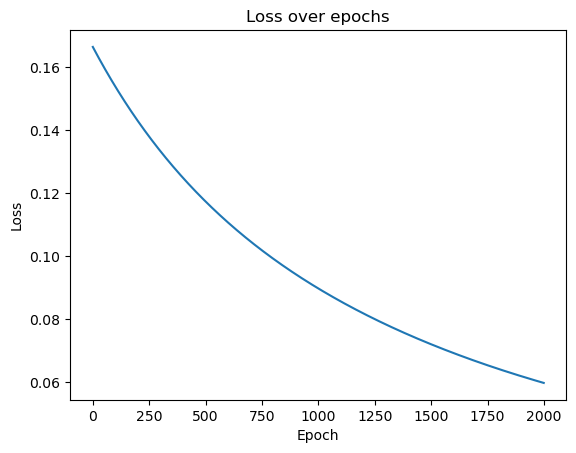

In [28]:
trained_params = train_with_loss_plot(X, y, parameters, epochs=2000, learning_rate=0.5)

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def evaluate_model(X, Y, parameters):
    m = X.shape[1]
    predictions = []
    for i in range(m):
        X_i = X[:, i].reshape(-1, 1)
        pred = predict(X_i, parameters)
        predictions.append(ord(pred) - ord('A'))
    predictions = np.array(predictions)
    accuracy = np.mean(predictions == Y)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    cm = confusion_matrix(Y, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[chr(i) for i in range(65, 91)])
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title("Confusion Matrix")
    plt.show()

Accuracy: 100.00%


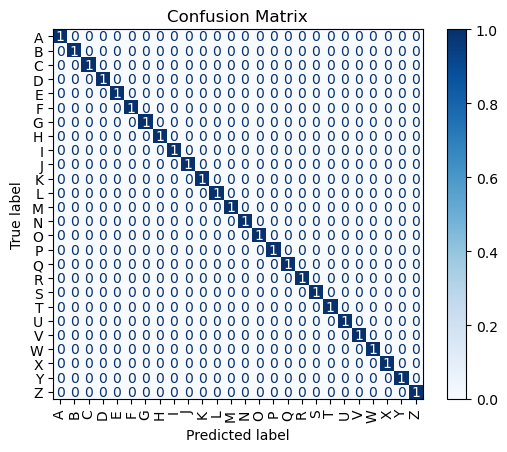

In [30]:
evaluate_model(X, y, trained_params)